# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### <font color="red">Exercise 04.1: Improving the Molecular Dynamics code<font>

For this class, we were given a Molecular Dynamics code that can perform simulations exploiting the Verlet algorithm.

The program starts the simulation from a provided spatial configuration of the $N$ particles read in a file and generating random initial velocities for the particles. Once the simulation is finished, it writes out the final configuration in another text file. 

First, we have to improve the MD code by enabling the possibility to start both from a single spacial configuration with random velocities and from two spacial configurations at successive times. Secondly, we are going to add the possibility of rescaling the velocities to match a desired temperature in the case of the two initial files.

### <font color="red">Exercise 04.2: Adding thermodynamical properties measurement<font>

The Molecular Dynamics code we have been provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.

By exploiting block averaging, we are going to calculate the average values and their uncertainties for $E/N$, $U/N$, $K/N$ and $T$, that will be written in new specific output files. The block averaging allows us to write the average value block by block, not just at the end of the process.

We show an example of these features on a system with $108$ particles, temperature $1.9$ and density $0.8$ (expressed in Lennard-Jones units). All the results are expressed in Lennard-Jones units too.

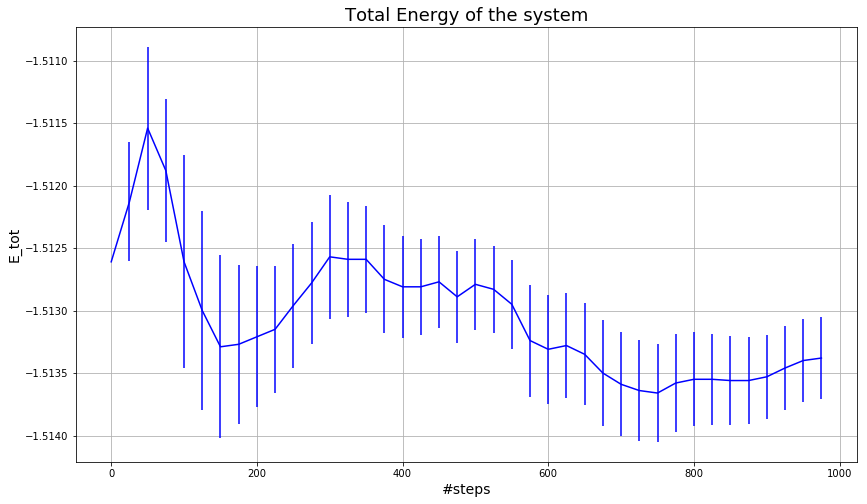

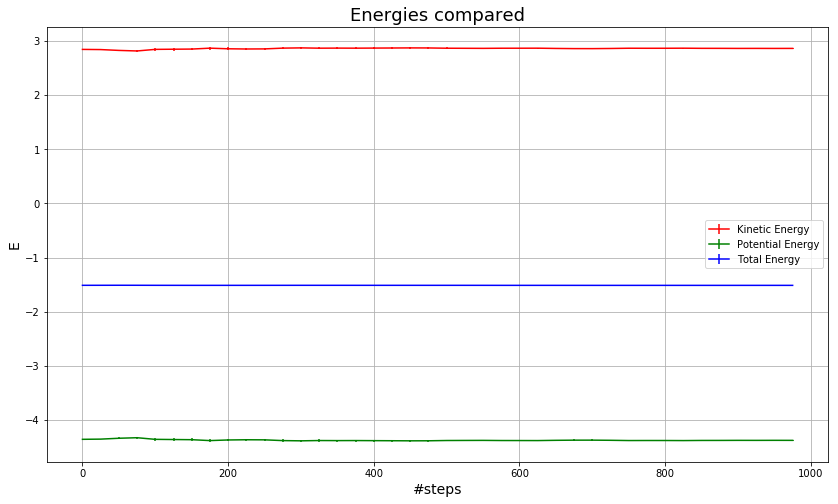

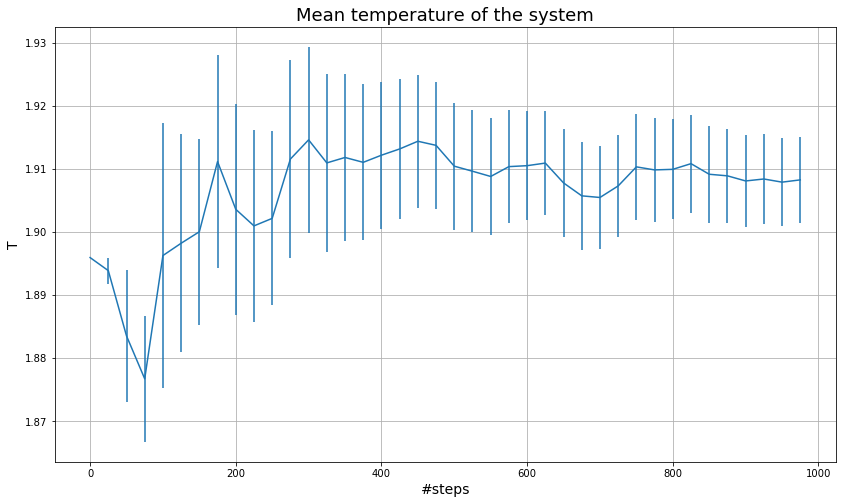

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000                # Total number of throws
N=40                  # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N


x = np.arange(N)      # [0,1,2,...,N-1]

ekin_mean, ekin_err = np.loadtxt("./MolecularDynamics_NVE/Test/ave_ekin.dat", usecols=(0,1), delimiter=' ', unpack='true')    
epot_mean, epot_err = np.loadtxt("./MolecularDynamics_NVE/Test/ave_epot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
etot_mean, etot_err = np.loadtxt("./MolecularDynamics_NVE/Test/ave_etot.dat", usecols=(0,1), delimiter=' ', unpack='true')    


x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(14, 8))
#plt.errorbar(x,ekin_mean,yerr=ekin_err, color='r')
#plt.errorbar(x,epot_mean,yerr=epot_err, color='g')
plt.errorbar(x,etot_mean,yerr=etot_err, color='b')
plt.title('Total Energy of the system', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot', fontsize=14)
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,ekin_mean,yerr=ekin_err, color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean,yerr=epot_err, color='g', label='Potential Energy')
plt.errorbar(x,etot_mean,yerr=etot_err, color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E', fontsize=14)
plt.grid(True)
plt.show()

temp_mean, temp_err = np.loadtxt("./MolecularDynamics_NVE/Test/ave_temp.dat", usecols=(0,1), delimiter=' ', unpack='true')       

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,temp_mean,yerr=temp_err)
plt.title('Mean temperature of the system', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.grid(True)
plt.show()

### <font color="red">Exercise 04.3: Measuring pressure<font>

Now we'll include the calculation of the pressure, $P$: istantaneous values, average values and uncertainties.

We will exploit the virial theorem, according to which the pressure in a Lennard-Jones system can be estimated by:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Then we show our results on the same test-system of the previous point (pressure is expressed in Lennard-Jones units).

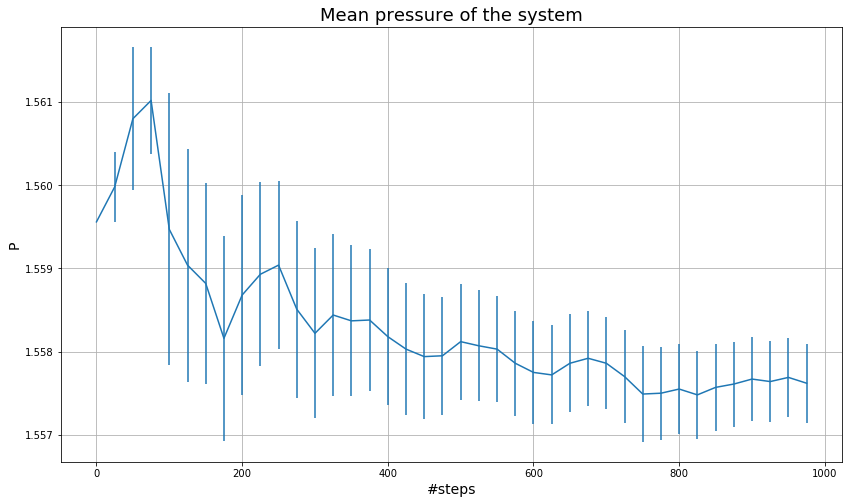

In [2]:
press_mean, press_err = np.loadtxt("./MolecularDynamics_NVE/Test/ave_press.dat", usecols=(0,1), delimiter=' ', unpack='true')       

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,press_mean,yerr=press_err)
plt.title('Mean pressure of the system', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.grid(True)
plt.show()

### <font color="red">Exercise 04.4: Running simulations on physical systems<font>

Now, using our modified version of the code, we perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

First we equilibrate the system and then show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$, all once the system has reached equilibrium.

Below we show plots of $E/N$, $U/N$, $K/N$, $T$ and $P$ regarding these three systems at equilibrium; the conversion to SI units is implemented while importing the raw data, which are instead expressed in Lennard-Jones units.

It is worth noting how well the integration of the equations of motion using the Verlet alogorithm conserves the energy for the period of times involved in our simulations, it is clear from the confront of the total energy with kinetic and potential one.

# Solid

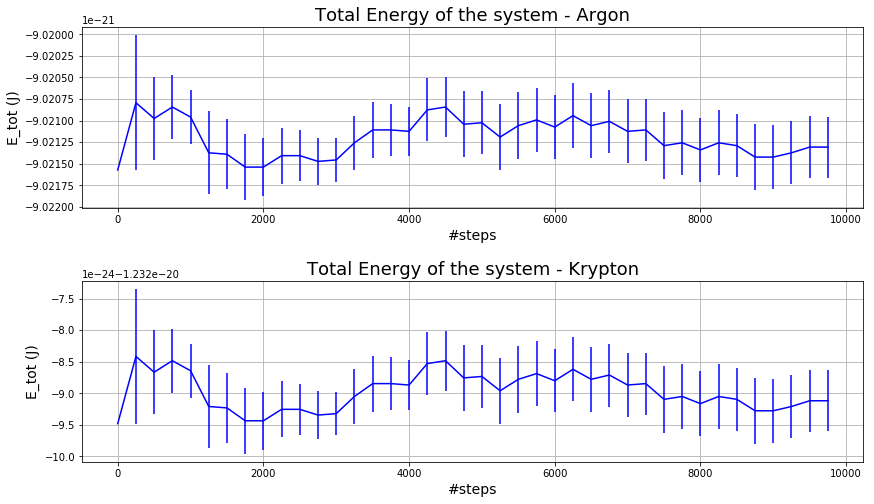

------------------------------------------------------------------------------------------------------------------


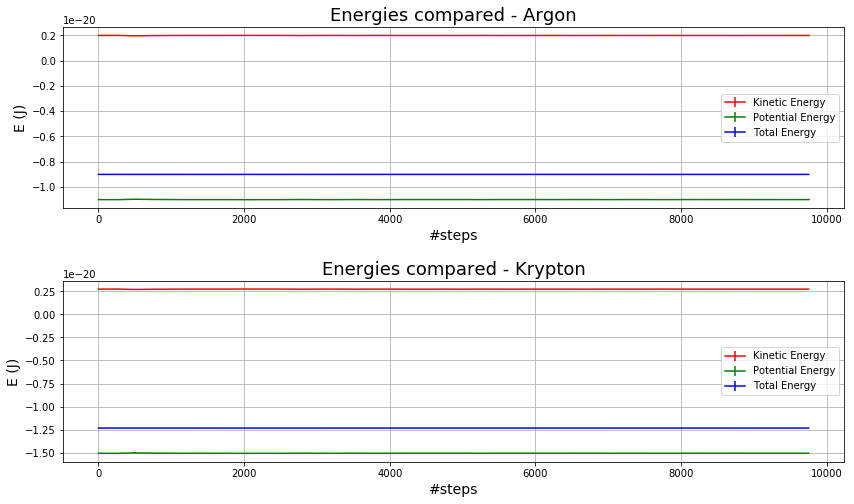

------------------------------------------------------------------------------------------------------------------


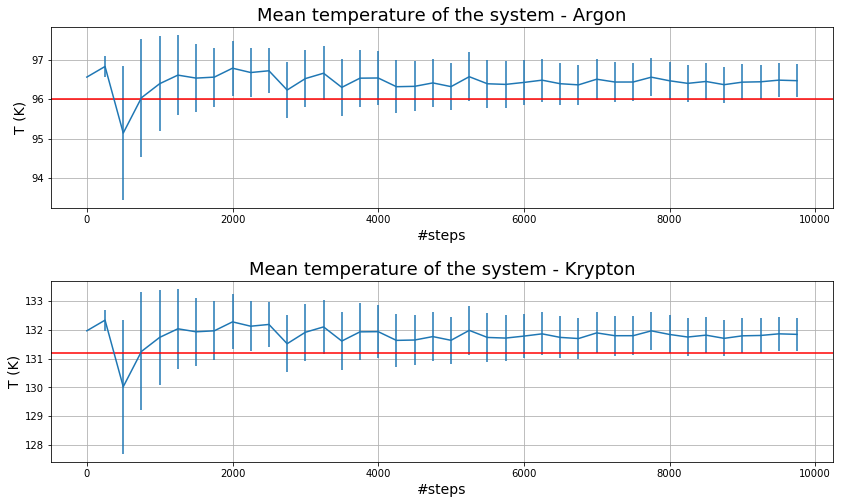

------------------------------------------------------------------------------------------------------------------


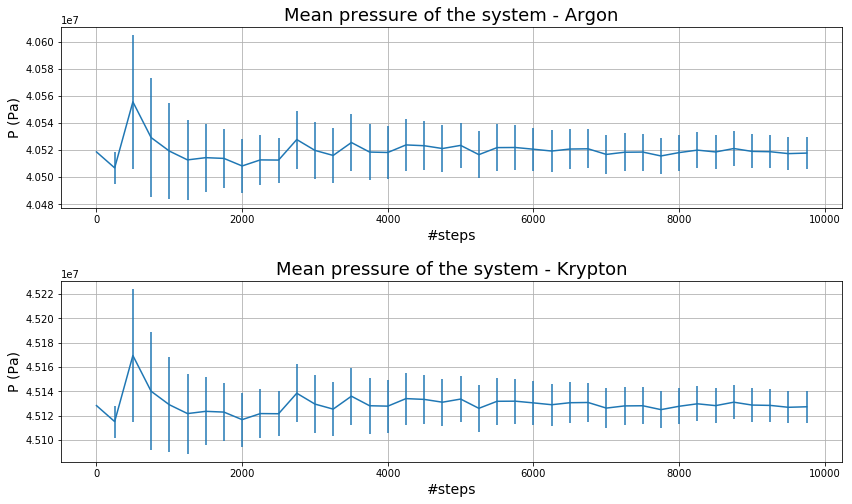

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=10000                # Total number of throws
N=40                  # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]

ekin_mean, ekin_err = np.loadtxt("./MolecularDynamics_NVE/Solid/ave_ekin.dat", usecols=(0,1), delimiter=' ', unpack='true')    
epot_mean, epot_err = np.loadtxt("./MolecularDynamics_NVE/Solid/ave_epot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
etot_mean, etot_err = np.loadtxt("./MolecularDynamics_NVE/Solid/ave_etot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
temp_mean, temp_err = np.loadtxt("./MolecularDynamics_NVE/Solid/ave_temp.dat", usecols=(0,1), delimiter=' ', unpack='true')       
press_mean, press_err = np.loadtxt("./MolecularDynamics_NVE/Solid/ave_press.dat", usecols=(0,1), delimiter=' ', unpack='true')       

x*=L # Number of throws = block * (Number of throws in each block)

#E_tot
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Energies compared
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,ekin_mean*120*1.38064853*(10**(-23)),yerr=ekin_err*120*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*120*1.38064853*(10**(-23)),yerr=epot_err*120*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,ekin_mean*164*1.38064853*(10**(-23)),yerr=ekin_err*164*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*164*1.38064853*(10**(-23)),yerr=epot_err*164*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Temperature
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,temp_mean*120,yerr=temp_err*120)
plt.title('Mean temperature of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=0.8*120, color='r', linestyle='-')
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,temp_mean*164,yerr=temp_err*164)
plt.title('Mean temperature of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=0.8*164, color='r', linestyle='-')
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Pressure
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,press_mean*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3),yerr=press_err*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3))
plt.title('Mean pressure of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,press_mean*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3),yerr=press_err*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3))
plt.title('Mean pressure of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
plt.show()

# Liquid

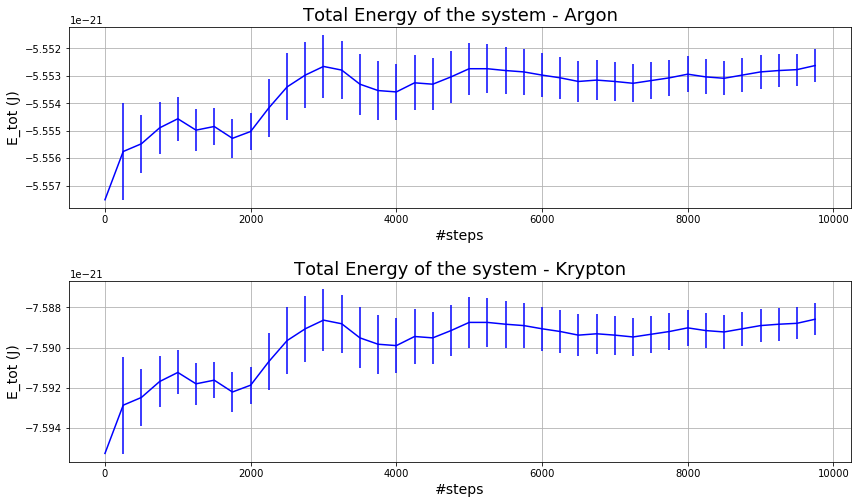

------------------------------------------------------------------------------------------------------------------


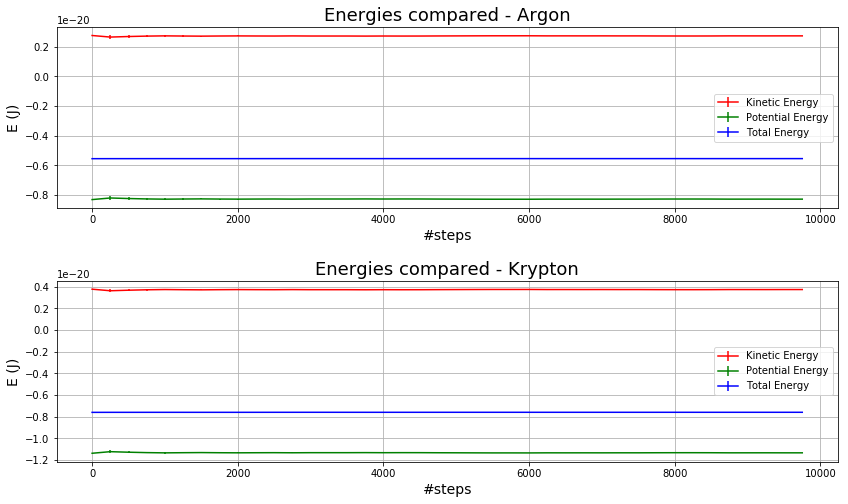

------------------------------------------------------------------------------------------------------------------


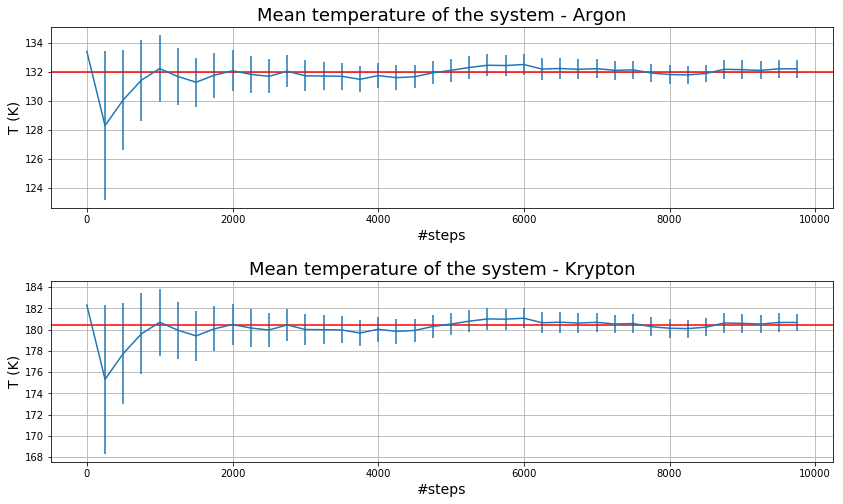

------------------------------------------------------------------------------------------------------------------


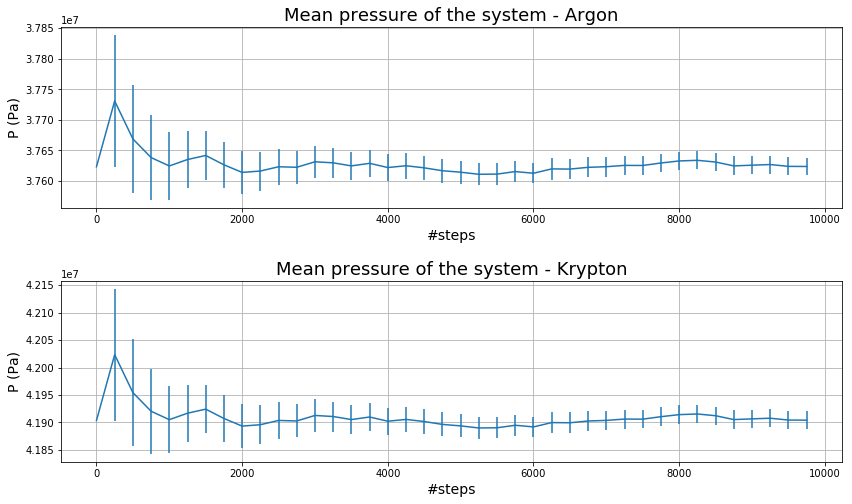

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=10000                # Total number of throws
N=40                  # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]

ekin_mean, ekin_err = np.loadtxt("./MolecularDynamics_NVE/Liquid/ave_ekin.dat", usecols=(0,1), delimiter=' ', unpack='true')    
epot_mean, epot_err = np.loadtxt("./MolecularDynamics_NVE/Liquid/ave_epot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
etot_mean, etot_err = np.loadtxt("./MolecularDynamics_NVE/Liquid/ave_etot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
temp_mean, temp_err = np.loadtxt("./MolecularDynamics_NVE/Liquid/ave_temp.dat", usecols=(0,1), delimiter=' ', unpack='true')       
press_mean, press_err = np.loadtxt("./MolecularDynamics_NVE/Liquid/ave_press.dat", usecols=(0,1), delimiter=' ', unpack='true')       

x*=L # Number of throws = block * (Number of throws in each block)

#E_tot
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Energies compared
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,ekin_mean*120*1.38064853*(10**(-23)),yerr=ekin_err*120*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*120*1.38064853*(10**(-23)),yerr=epot_err*120*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,ekin_mean*164*1.38064853*(10**(-23)),yerr=ekin_err*164*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*164*1.38064853*(10**(-23)),yerr=epot_err*164*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Temperature
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,temp_mean*120,yerr=temp_err*120)
plt.title('Mean temperature of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=1.1*120, color='r', linestyle='-')
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,temp_mean*164,yerr=temp_err*164)
plt.title('Mean temperature of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=1.1*164, color='r', linestyle='-')
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Pressure
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,press_mean*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3),yerr=press_err*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3))
plt.title('Mean pressure of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,press_mean*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3),yerr=press_err*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3))
plt.title('Mean pressure of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
plt.show()

# Gas

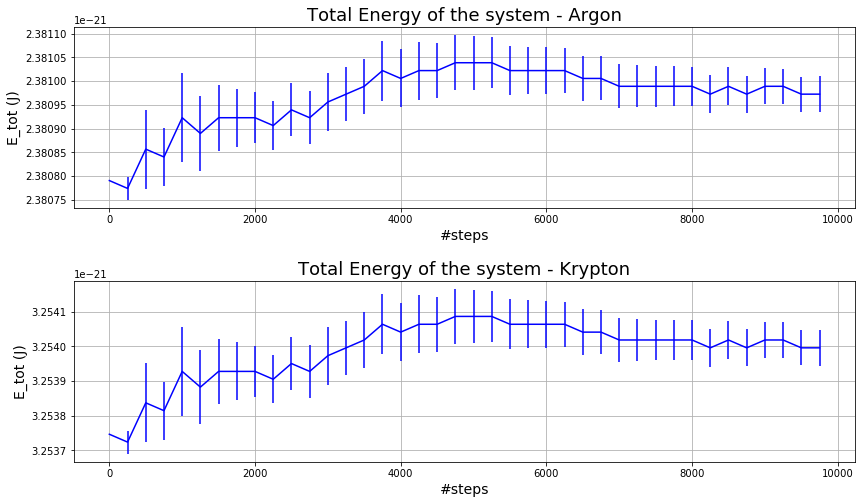

------------------------------------------------------------------------------------------------------------------


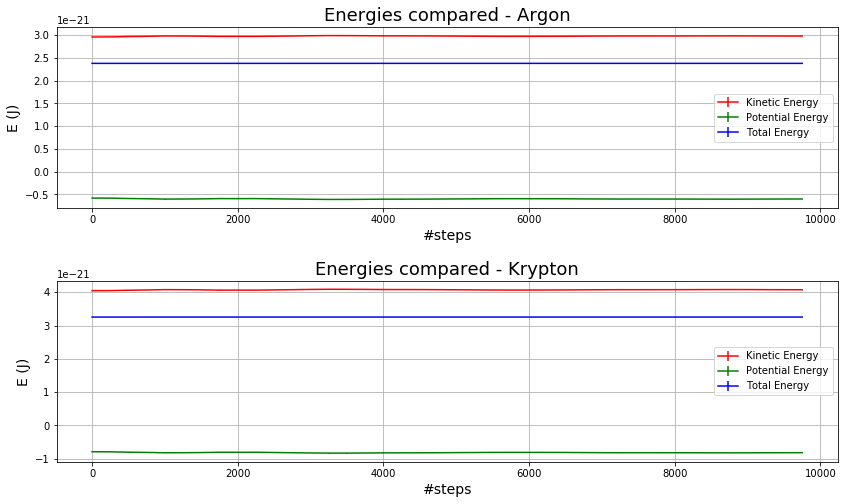

------------------------------------------------------------------------------------------------------------------


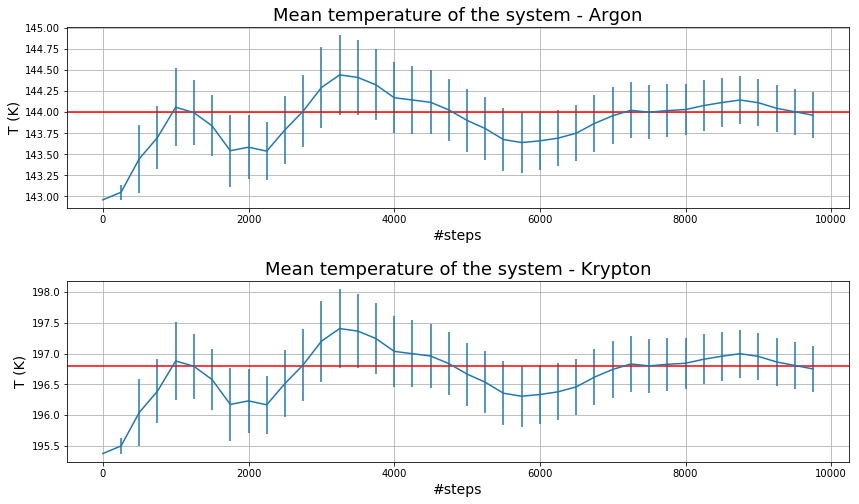

------------------------------------------------------------------------------------------------------------------


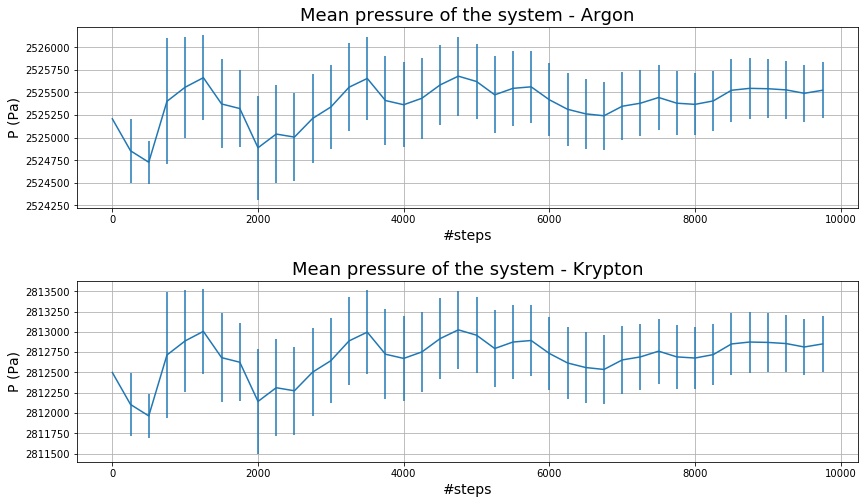

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=10000                # Total number of throws
N=40                  # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]

ekin_mean, ekin_err = np.loadtxt("./MolecularDynamics_NVE/Gas/ave_ekin.dat", usecols=(0,1), delimiter=' ', unpack='true')    
epot_mean, epot_err = np.loadtxt("./MolecularDynamics_NVE/Gas/ave_epot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
etot_mean, etot_err = np.loadtxt("./MolecularDynamics_NVE/Gas/ave_etot.dat", usecols=(0,1), delimiter=' ', unpack='true')    
temp_mean, temp_err = np.loadtxt("./MolecularDynamics_NVE/Gas/ave_temp.dat", usecols=(0,1), delimiter=' ', unpack='true')       
press_mean, press_err = np.loadtxt("./MolecularDynamics_NVE/Gas/ave_press.dat", usecols=(0,1), delimiter=' ', unpack='true')       

x*=L # Number of throws = block * (Number of throws in each block)

#E_tot
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b')
plt.title('Total Energy of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E_tot (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Energies compared
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,ekin_mean*120*1.38064853*(10**(-23)),yerr=ekin_err*120*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*120*1.38064853*(10**(-23)),yerr=epot_err*120*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*120*1.38064853*(10**(-23)),yerr=etot_err*120*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,ekin_mean*164*1.38064853*(10**(-23)),yerr=ekin_err*164*1.38064853*(10**(-23)), color='r', label='Kinetic Energy')
plt.errorbar(x,epot_mean*164*1.38064853*(10**(-23)),yerr=epot_err*164*1.38064853*(10**(-23)), color='g', label='Potential Energy')
plt.errorbar(x,etot_mean*164*1.38064853*(10**(-23)),yerr=etot_err*164*1.38064853*(10**(-23)), color='b', label='Total Energy')
plt.legend()
plt.title('Energies compared - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('E (J)', fontsize=14)
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Temperature
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,temp_mean*120,yerr=temp_err*120)
plt.title('Mean temperature of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=1.2*120, color='r', linestyle='-')
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,temp_mean*164,yerr=temp_err*164)
plt.title('Mean temperature of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('T (K)', fontsize=14)
plt.axhline(y=1.2*164, color='r', linestyle='-')
plt.grid(True)
plt.show()
print('------------------------------------------------------------------------------------------------------------------')

#Pressure
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
#Argon
plt.subplot(2, 1, 1)
plt.errorbar(x,press_mean*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3),yerr=press_err*120*1.38064853*(10**(-23))/((0.34*(10**(-9)))**3))
plt.title('Mean pressure of the system - Argon', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
#Krypton
plt.subplot(2, 1, 2)
plt.errorbar(x,press_mean*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3),yerr=press_err*164*1.38064853*(10**(-23))/((0.364*(10**(-9)))**3))
plt.title('Mean pressure of the system - Krypton', fontsize=18)
plt.xlabel('#steps', fontsize=14)
plt.ylabel('P (Pa)', fontsize=14)
plt.grid(True)
plt.show()